## pierwsze modele kwantowe 


In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_clf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss='hinge'))
    ]
)

svm_clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [3]:
print(f"Test acc: {svm_clf.score(X_test, y_test):.2f}")

Test acc: 1.00


/var/folders/53/b8z3c5xs0l51w2mzflnyk6400000gn/T/ipykernel_31970/3794771256.py:17: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])


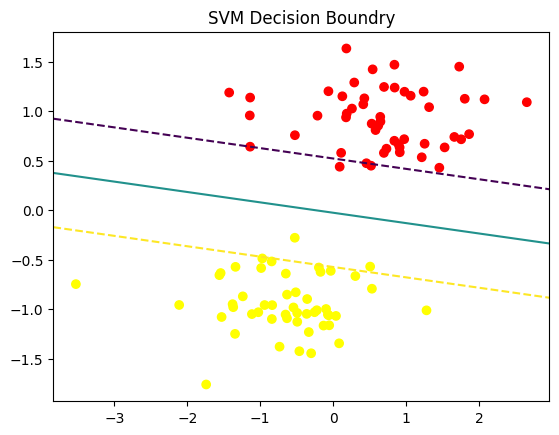

In [4]:
def plot_svm_pipeline(pipeline, X, y):
    scaler = pipeline.named_steps['scaler']
    svc = pipeline.named_steps['linear_svc']
    X_scaled = scaler.transform(X)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])

    plt.title("SVM Decision Boundry")
    plt.show()

plot_svm_pipeline(svm_clf, X, y)

## Kernel trick

Dla prawdziwych danych trudno oczekiwać aby były one liniowo separowalne. 

Dlatego jednym z rozwiązań jest stworzenie odwzorowania do wyżej wymiarowej przestrzeni tak by dane w niej były już liniowo separowalne. Obliczenie takiej transformacji dla dowolnych danych jest bardzo trudne, dlatego możemy zastosować tzw kernel trick. Potrzebujemy tylko obliczyć iloczyn skalarny:
$$ K(x,x') = <\phi(x), \phi(x')>$$
bez jawnego wyznaczania $\phi$.


- x, x' wektory wejściowe z oryginalnej przestrzeni
- $\phi(x)$ odwzorowanie do przestrzeni o wyższym wymiarze
- $K(x, x')$ funkcja jądrowa - kernel function - oblicza iloczy skalarny w zadanej przestrzeni.

1. Linear - $K(x, x') = x^{T}x'$
2. Polynomial - $K(x,x') = (x^{T}x' +c)^d$
3. RBF - $K(x,x') = exp(-\gamma \, |x-x'|^2)$

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=44)

poly_svm_clf = Pipeline([
  #  ('polu_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge'))
])

poly_svm_clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [6]:
print(f"Test acc: {poly_svm_clf.score(X_test, y_test):.2f}")

Test acc: 0.82


In [7]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

In [8]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [9]:
def plot_decision_boundry(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min(), X[:, 0].max()+1
    y_min, y_max = X[:, 1].min(), X[:, 1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

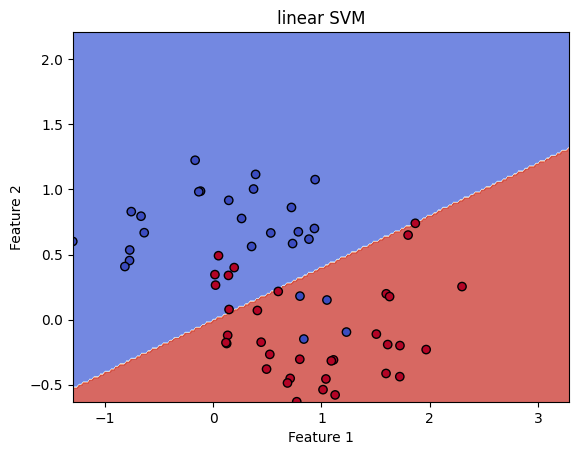

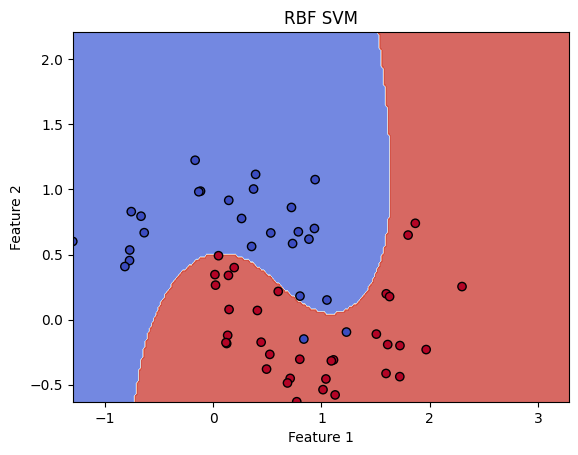

In [10]:
plot_decision_boundry(linear_svm, X_test, y_test, "linear SVM")
plot_decision_boundry(rbf_svm, X_test, y_test, "RBF SVM")

## Idea swap testu

Swap test służy do obliczania wartości

$$ |\langle \psi |\phi \rangle |^2 $$

czyli kwadratu modułu iloczynu skalarnego dwóch stanów kwantowych $|\psi \rangle$ i $|\phi \rangle$ .


### 🔧  Obwód swap testu

Swap test używa dodatkowego kubitu kontrolnego oraz bramki SWAP

Kontrolny kubit realizowany jest w stanie $|0\rangle$.

$$ \ket{\psi_0} = \ket{0} \otimes \ket{\psi} \otimes \ket{\phi} $$

### 🎛️  Jak to działa

- Zastosuj Hadamarda (zamiana bazy) na kontrolny (ancilla) kubit 
$$ \ket{\psi_1} = (\ket{0} + \ket{1}) \otimes \ket{\psi} \otimes \ket{\phi} $$
- Zastosuj CSWAP (3 kubitowa bramka - controll = ancilla)
- Zastosuj Hadamarda (powrót do bazy)
- Pomiar ancilla kubitu.


Prawdopodobieństwo, że kontrolny kubit da wynik $0$, wynosi:
$$P(0)=\frac{1+|\langle \psi |\phi \rangle |^2}{2}$$

Prawdopodobieństwo, że kontrolny kubit da wynik 1, wynosi:
$$P(1)=\frac{1-|\langle \psi |\phi \rangle |^2}{2}$$

Dzięki temu, mierząc kontrolny kubit, możemy wyznaczyć overlap między stanami.


In [11]:
import pennylane as qml
import pennylane.numpy as np

dev_test = qml.device('default.qubit', wires=['ancilla','phi','psi'], shots=5000)

@qml.qnode(dev_test)
def swap_test():
    qml.Hadamard(wires='ancilla')
    
    qml.X(wires=['phi'])
    qml.Hadamard(wires=['psi'])

    qml.CSWAP(wires=['ancilla', 'phi', 'psi'])
    qml.Hadamard(wires='ancilla')
    return qml.sample(wires='ancilla')

res = swap_test()

print(f"P(0) = {np.mean(res==0)}, P(1) = {np.mean(res == 1)}")
print(f"{2*np.mean(res==0) - 1}")

P(0) = 0.746, P(1) = 0.254
0.492


/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


sprawdzenie


In [13]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def phi():
    qml.X(wires=0)
    return qml.state()

@qml.qnode(dev)
def psi():
    qml.Hadamard(wires=0)
    return qml.state()

def theory(phi, psi):
    inner = np.vdot(phi, psi)
    return float(np.abs(inner)**2)

theory(psi(), phi())

0.4999999999999999

## Quantum Embedding

Kwantowy Embedding reprezentuje klasyczne dane jako stan (wektor) w przestrzeni Hilberta. 
Odwzorowanie, które generuje embedding nazywamy quantum feature map. 

Feature map: $\phi: X \to F$ gdzie $F$ to nowa przestrzeń Hilberta stanów.
$$ x \to \ket{\phi(x)} $$

W naszym przypadku to odwzorowanie realizują $U_{\phi}(x)$ macierze kodowania kątowego. 
$$ \ket{0} \to U_{\phi}(x)\ket{0} $$

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

y_scaled = 2 * y -1 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

Rozważmy model kwantowy w postaci: 
$$ 
f(x) = \braket{\phi(x) | M | \phi{x} } 
$$ 

Model może być realizowany jako _wariacyjny obwód kwantowy_.

Zamiast jednak trenować parametry dla takiego obwodu możemy wykorzystać kwantowy kernel który realizuje się przez SWAP test. 

Zamiast SWAP testu możemy wykorzystać inny obwód [Szczegóły tutaj](https://pennylane.ai/qml/demos/tutorial_kernel_based_training)

In [18]:
from pennylane.templates import AngleEmbedding


n_qubits = 2
dev_kernel = qml.device('lightning.qubit', wires= n_qubits)



projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
projector[0, 0] = 1

In [21]:
@qml.qnode(dev_kernel)
def kernel(x1, x2):
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [22]:
X_train = np.array(X_train, requires_grad=False)
X_test = np.array(X_test, requires_grad=False)

y_train = np.array(y_train, requires_grad=False)
y_test = np.array(y_test, requires_grad=False)

In [23]:
kernel(X_train[0], X_train[0]), kernel(X_test[0], X_test[1])

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


(array(1.), array(0.84505579))

In [24]:
def kernel_matrix(A, B):
    return np.array([[kernel(a,b) for b in B] for a in A])

svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


In [25]:
predictions = svm.predict(X_test)

In [26]:
print(f"model qsvm {accuracy_score(predictions, y_test):.4f}")

model qsvm 0.8600


In [ ]:
svm.predict(X_test[:4]), y_test[:4]

### Zadanie 
Wygeneruj kernel oraz wykonaj model QSVM dla poprzenich danych : 
```python
def zz_feature_map(x, wires=[0,1]):
    for i in range(len(wires)):
        qml.Hadamard(wires=wires[i])

    for i in range(len(wires)):
        qml.RX(2 * x[i], wires=wires[i])

    theta = (np.pi - x[0])* (np.pi - x[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.RZ(2 * theta, wires=wires[1])
    qml.CNOT(wires=[wires[0], wires[1]])

```

## Kwantowa regresja

In [29]:
X = np.linspace(0, 2*np.pi, 5) 
X.requires_grad = False
Y = np.sin(X) 

X_test = np.linspace(0.2, 2*np.pi+0.2, 5)
Y_test = np.sin(X_test)

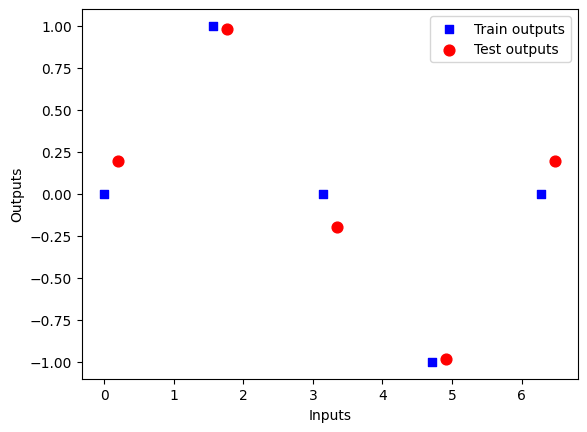

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
plt.xlabel("Inputs")
plt.ylabel("Outputs")

plt.legend(loc='upper right');
plt.show()

In [35]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def qreg(datapoint, params):
    qml.RX(datapoint, wires=0)
    qml.RY(params, wires=0)
    #qml.Rot(params[0], params[1], params[2], wires=0)
    return qml.expval(qml.PauliZ(wires=0))

(<Figure size 500x200 with 1 Axes>, <Axes: >)

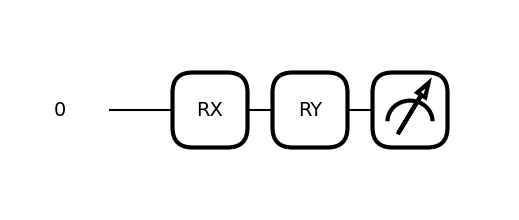

In [36]:
qml.draw_mpl(qreg)([0.1],[0.2])

In [38]:
[qreg(x, 0.5)  for x in X] 

[tensor(0.87758256, requires_grad=True),
 tensor(1.11022302e-16, requires_grad=True),
 tensor(-0.87758256, requires_grad=True),
 tensor(-1.11022302e-16, requires_grad=True),
 tensor(0.87758256, requires_grad=True)]

In [39]:
def loss_func(predictions):
 
    total_losses = 0
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2
        total_losses += loss
    return total_losses

In [42]:
def cost_fn(params):
    predictions = [qreg(x, params)  for x in X]
    cost = loss_func(predictions)
    return cost

In [43]:
opt = qml.GradientDescentOptimizer(stepsize=0.2)

params = np.array([0.4], requires_grad=True)

for i in range(100):
    params, prev_cost = opt.step_and_cost(cost_fn, params)
    if i%10 == 0:
        print(f'Step = {i} Cost = {cost_fn(params)}')

Step = 0 Cost = [3.36513589]
Step = 10 Cost = [2.]
Step = 20 Cost = [2.]
Step = 30 Cost = [2.]
Step = 40 Cost = [2.]
Step = 50 Cost = [2.]
Step = 60 Cost = [2.]
Step = 70 Cost = [2.]
Step = 80 Cost = [2.]
Step = 90 Cost = [2.]


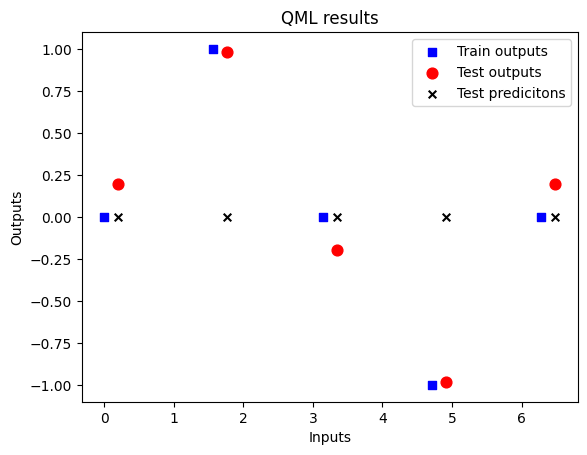

In [46]:
test_predictions = []
for x_test in X_test:
    prediction = qreg(x_test, params)
    test_predictions.append(prediction)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()

In [50]:
import pennylane as qml
import pennylane.numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_regression(datapoint, params):
    qml.AngleEmbedding(datapoint, wires=range(n_qubits))
    qml.StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

In [53]:
shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)
shape

(2, 3, 3)

In [54]:
inputs = [0.3]
params = np.random.random(size=shape)

print(inputs, params)

[0.3] [[[0.98800917 0.56995002 0.59715563]
  [0.28215755 0.92825046 0.79220626]
  [0.71667081 0.34879264 0.79418002]]

 [[0.45923874 0.2484918  0.7642648 ]
  [0.34818393 0.77342551 0.71944554]
  [0.79462278 0.84043035 0.13915954]]]


Matplotlib is building the font cache; this may take a moment.


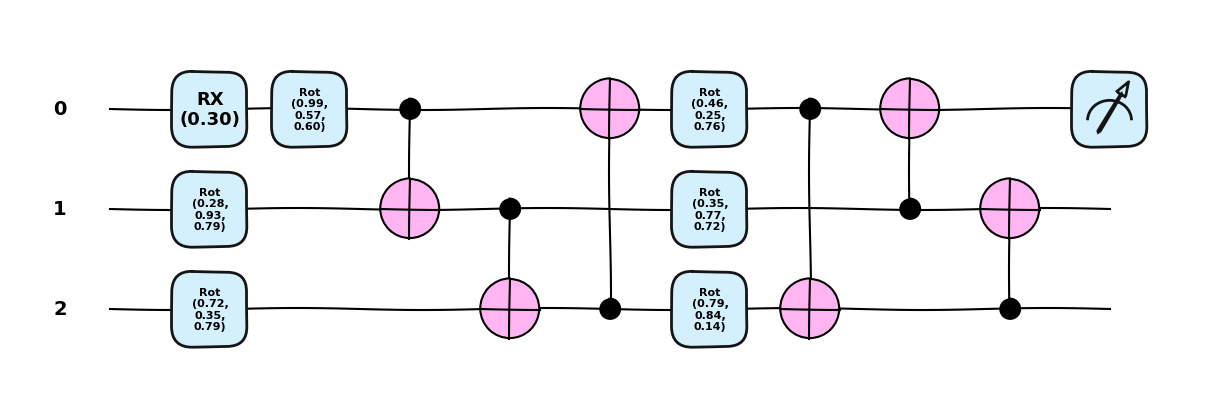

In [56]:
import matplotlib.pyplot as plt
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(quantum_regression, decimals=2,level='device')(inputs, params)
plt.show()

In [59]:
def cost_fn(params):
    predictions = [quantum_regression([x], params)  for x in X]
    cost = loss_func(predictions)
    return cost

In [60]:
for i in range (100):
    params, prev_cost = opt.step_and_cost(cost_fn, params)
    if i%10 == 0:
        print(f'Step = {i} Cost = {cost_fn(params)}')

Step = 0 Cost = 1.976972461237902
Step = 10 Cost = 0.018757250387467495
Step = 20 Cost = 0.003508288809442019
Step = 30 Cost = 0.0014923572177364891
Step = 40 Cost = 0.0008485647250635812
Step = 50 Cost = 0.0005593337594326065
Step = 60 Cost = 0.0004030880858351285
Step = 70 Cost = 0.0003082942511157639
Step = 80 Cost = 0.0002459964786782721
Step = 90 Cost = 0.00020259043801405815


In [61]:
test_predictions = []
for x_test in X_test:
    prediction = quantum_regression([x_test],params)
    test_predictions.append(prediction)

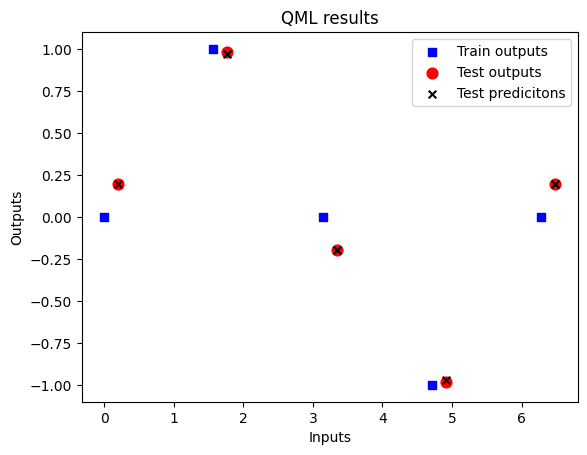

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

## klasyfikacja


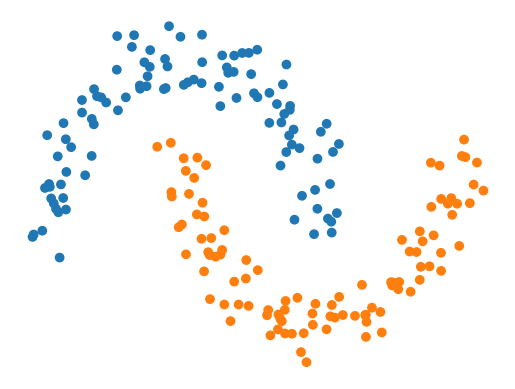

In [63]:
import torch
import pennylane.numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

torch.manual_seed(123)


X, y = make_moons(n_samples=200, noise=0.1)

# create torch

X = torch.from_numpy(X).to(torch.float32)

y_ = torch.from_numpy(y).view(-1,1)


c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # kolorowanie
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()


y_hot = torch.scatter(torch.zeros((200, 2)), 1, y_, 1).to(torch.float32)

# X = X.clone().detach().requires_grad_(True)

In [64]:
y_hot[:10]

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [65]:
import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 4

weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

In [66]:
class QN2(torch.nn.Module):
    '''Classical -> Quantum -> Classical'''

    def __init__(self, quanutm_layer):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(2, 2),
            quanutm_layer,
            torch.nn.Linear(2, 2),
            torch.nn.Softmax(dim=1)
        )
        

    def forward(self, x):
        return  self.layers(x)

In [67]:
qclassifier = QN2(qlayer)
print(qclassifier)

opt = torch.optim.SGD(qclassifier.parameters(), lr=0.2)
loss = torch.nn.L1Loss()

QN2(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): <Quantum Torch Layer: func=qnode>
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)


In [68]:
batch_size = 5
batches = 200 // batch_size

data_loader = torch.utils.data.DataLoader(
    list(zip(X, y_hot)), batch_size=5, shuffle=True, drop_last=True
)

epochs = 6

for epoch in range(epochs):

    running_loss = 0

    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(qclassifier(xs), ys)
        loss_evaluated.backward()

        opt.step()

        running_loss += loss_evaluated

    avg_loss = running_loss / batches
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))

y_pred = qclassifier(X)
predictions = torch.argmax(y_pred, axis=1).detach().numpy()

correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print(f"Accuracy: {accuracy * 100}%")

Average loss over epoch 1: 0.4244
Average loss over epoch 2: 0.2587
Average loss over epoch 3: 0.1951
Average loss over epoch 4: 0.1682
Average loss over epoch 5: 0.1543
Average loss over epoch 6: 0.1416
Accuracy: 86.5%
